# Lab: Network methods -- Critical Path Method / PERT in python



# we have a list of tasks

| Original | New Name | Duration (Days) |
|----------|----------|----------------|
| A | Gather Requirements | 2 |
| B | Market Research | 5 |
| C | Technical Feasibility | 4 |
| D | Initial Prototype | 5 |
| E | UI/UX Mockups | 7 |
| F | Backend Setup | 3 |
| G | Frontend Setup | 3 |
| H | Integration Testing | 6 |
| I | Infrastructure Deploy | 2 |
| J | Marketing Plan | 5 |
| K | Final QA | 4 |
| L | Beta Release | 3 |
| M | Production Deploy | 12 |
| N | Product Launch | 8 |


**Gather Requirements (A)**: The team starts by interviewing stakeholders and end-users to identify what the new product must do.

**Market Research (B)**: In parallel or soon after, the marketing team and product managers investigate market trends, user demographics, and competitor analysis.

**Technical Feasibility (C)**: Engineers assess existing technologies, technical risks, and high-level architectural constraints to ensure the project is viable.

**Initial Prototype (D)**: Once Market Research (B) is in hand, the engineering team designs a bare-bones prototype—a first pass at how the product might function (hardware mockup or software MVP).
- *Dependency*: D depends on B (i.e., we incorporate feedback and insights from the market research into the prototype)

**UI/UX Mockups (E)**: After Requirements (A) are well defined, a design team creates user interface prototypes and user experience flows.
- *Dependency*: E depends on A (requirements must be gathered first)

**Backend Setup (F)**: The tech team configures servers, databases, or core backend services.
- *Dependency*: F depends on A (the requirements inform what kind of backend is needed)

**Frontend Setup (G)**: Based on Market Research (B), the team sets up the initial front-end or user-facing components.
- *Dependency*: G depends on B (the market insights help shape the look/feel and technology stack)

**Integration Testing (H)**: The initial prototype (D) and feasibility results (C) feed into the process of connecting various components (front-end, back-end, hardware) and testing them together.
- *Dependencies*: H depends on C (must confirm tech feasibility) and D (the prototype must exist to integrate)

**Infrastructure Deployment (I)**: The infrastructure (servers, networks, cloud resources) is deployed based on the final approach from C (technical feasibility) and with insights from D (prototype structure).
- *Dependencies*: I depends on C and D

**Marketing Plan (J)**: Once the UI/UX mockups (E) are ready, marketing creates a campaign plan—advertising strategies, social media, pricing approach, etc.
- *Dependency*: J depends on E (final UI designs guide the marketing messages)

**Final QA (K)**: Comprehensive quality assurance across front-end (G), back-end (F), and integrated system (H).
- *Dependencies*: K depends on F, G, and H (the product must be integrated and both front-end/back-end must be set up before final QA)

**Beta Release (L)**: A limited release to a small group of users for real-world feedback and bug-finding.
- *Dependencies*: L depends on F, G, and H (all must be stable enough for a beta)

**Production Deployment (M)**: After infrastructure is up (I), the product is technically ready to be deployed in a production environment (final servers, domain configuration, etc.).
- *Dependency*: M depends on I (the infrastructure must be in place)

**Product Launch (N)**: The official go-live date for the product to the general market.
- *Dependencies*: N depends on J (marketing plan must be ready) and K (product must pass final QA)

| Dependency | Meaning |
|------------|---------|
| B → D (B,D) | Market Research must precede Initial Prototype |
| A → E (A,E) | Gather Requirements must precede UI/UX Mockups |
| A → F (A,F) | Gather Requirements must precede Backend Setup |
| B → G (B,G) | Market Research must precede Frontend Setup |
| C → H (C,H) | Technical Feasibility must precede Integration Testing |
| D → H (D,H) | Initial Prototype must precede Integration Testing |
| C → I (C,I) | Technical Feasibility must precede Infrastructure |
| D → I (D,I) | Initial Prototype must precede Infrastructure |
| E → J (E,J) | UI/UX Mockups must precede Marketing Plan |
| F → K (F,K) | Backend Setup must precede Final QA |
| G → K (G,K) | Frontend Setup must precede Final QA |
| H → K (H,K) | Integration Testing must precede Final QA |
| F → L (F,L) | Backend Setup must precede Beta Release |
| G → L (G,L) | Frontend Setup must precede Beta Release |
| H → L (H,L) | Integration Testing must precede Beta Release |
| I → M (I,M) | Infrastructure must precede Production Deployment |
| J → N (J,N) | Marketing Plan must precede Product Launch |
| K → N (K,N) | Final QA must precede Product Launch |

In [10]:
# If needed in a Colab environment, uncomment to install:
!pip install networkx
!pip install criticalpath

import matplotlib.pyplot as plt
import networkx as nx
from criticalpath import Node

# For a notebook environment, make sure plots appear inline:
%matplotlib inline


In [11]:
# Each item is: (TaskName, {'Duration': X})
tasks = [
    ('A', {'Duration': 2}),
    ('B', {'Duration': 5}),
    ('C', {'Duration': 4}),
    ('D', {'Duration': 5}),
    ('E', {'Duration': 7}),
    ('F', {'Duration': 3}),
    ('G', {'Duration': 3}),
    ('H', {'Duration': 6}),
    ('I', {'Duration': 2}),
    ('J', {'Duration': 5}),
    ('K', {'Duration': 4}),
    ('L', {'Duration': 3}),
    ('M', {'Duration': 12}),
    ('N', {'Duration': 8})
]

# Dependencies: a tuple (X, Y) means "Task Y depends on X" (X must finish before Y can start).
dependencies = [
    ('B','D'), ('A','E'), ('A','F'), ('B','G'),
    ('C','H'), ('D','H'), ('C','I'), ('D','I'),
    ('E','J'), ('F','K'), ('G','K'), ('H','K'),
    ('F','L'), ('G','L'), ('H','L'), ('I','M'),
    ('J','N'), ('K','N')
]

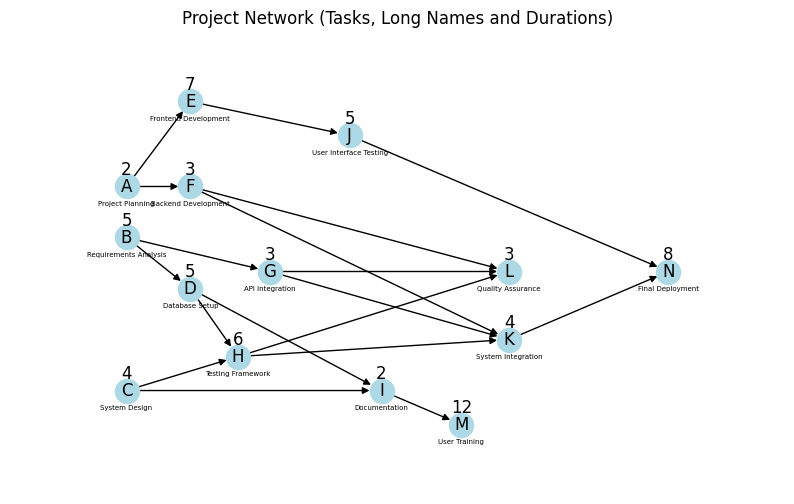

In [12]:
# Create a Directed Graph
G = nx.DiGraph()

# Add tasks as nodes
G.add_nodes_from(tasks)
# Add edges from dependencies
G.add_edges_from(dependencies)

# Define positions for each node for better visualization (arbitrary)
pos_nodes = {
    "A": (1, 15), "B": (1, 12), "C": (1, 3),
    "D": (5, 9),  "E": (5, 20), "F": (5, 15),
    "G": (10, 10), "H": (8, 5), "I": (17, 3),
    "J": (15, 18), "K": (25, 6), "L": (25, 10),
    "M": (22, 1), "N": (35, 10)
}
# Add long names for tasks
long_names = {
    'A': 'Project Planning',
    'B': 'Requirements Analysis',
    'C': 'System Design',
    'D': 'Database Setup',
    'E': 'Frontend Development',
    'F': 'Backend Development',
    'G': 'API Integration',
    'H': 'Testing Framework',
    'I': 'Documentation',
    'J': 'User Interface Testing',
    'K': 'System Integration',
    'L': 'Quality Assurance',
    'M': 'User Training',
    'N': 'Final Deployment'
}

# Add long names as node attributes
nx.set_node_attributes(G, long_names, 'LongName')


# Draw the graph
fig, ax = plt.subplots(figsize=(10,6))
nx.draw(G, pos=pos_nodes, ax=ax, with_labels=True, node_color='lightblue', arrowsize=10)

# Extract durations and long names
durations = nx.get_node_attributes(G, 'Duration')
long_names = nx.get_node_attributes(G, 'LongName')

# Position the duration labels slightly offset above nodes
pos_attrs_dur = {node: (coord[0], coord[1] + 1) for node, coord in pos_nodes.items()}
nx.draw_networkx_labels(G, pos=pos_attrs_dur, labels=durations)

# Position the long names below nodes with small font
pos_attrs_names = {node: (coord[0], coord[1] - 1) for node, coord in pos_nodes.items()}
nx.draw_networkx_labels(G, pos=pos_attrs_names, labels=long_names, font_size=5) # Added small font size

plt.title("Project Network (Tasks, Long Names and Durations)")
plt.margins(0.15) # Increased margins to accommodate labels
plt.show()

In [13]:
# Initialize the project in criticalpath
project = Node("MyProject")

# Add each task (node) with its duration
for task_name, attr in tasks:
    project.add(Node(task_name, duration=attr['Duration']))

# Add the dependencies
for dep in dependencies:
    # dep[0] -> dep[1]
    project.link(dep[0], dep[1])

# Update all info
project.update_all()

# Retrieve critical path
cp = [str(n) for n in project.get_critical_path()]
project_duration = project.duration

print(f"Critical Path: {cp}")
print(f"Total Project Duration: {project_duration} time units")


# Identify edges on the critical path

Critical Path: ['B', 'D', 'H', 'K', 'N']
Total Project Duration: 28 time units


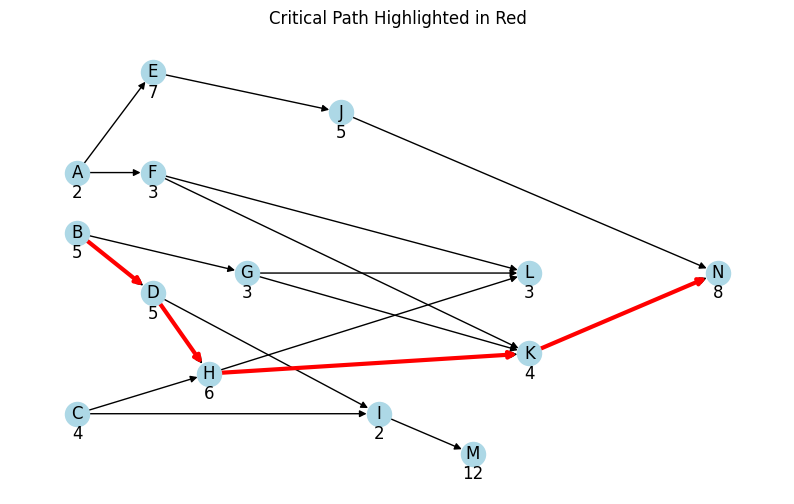

In [14]:
# Identify edges on the critical path
crit_edges = [(cp[i], cp[i+1]) for i in range(len(cp)-1)]

# Plot the same graph but highlight critical edges
fig, ax = plt.subplots(figsize=(10,6))
nx.draw(G, pos=pos_nodes, ax=ax, with_labels=True, node_color='lightblue', arrowsize=10)
nx.draw_networkx_labels(G, pos=pos_attrs_names, labels=durations)

# Draw the critical edges in red
nx.draw_networkx_edges(G, pos=pos_nodes, ax=ax, edgelist=crit_edges, width=3, edge_color='r')

plt.title("Critical Path Highlighted in Red")
plt.margins(0.05)
plt.show()

# Excercises
## Questions:
### How do you interpret the critical path?

### How do you interpret the total project duration?

### How do you interpret the slack time for each task?

### Modify the durations of the tasks and see how the critical path and total project duration change.


# **Robot Factory Project: 4-Task Schedule**

In this mini-project, a robotics factory is working on a **new service robot** prototype. The project involves four main tasks—outlined below with their durations (in days) and dependencies. We’ll then use these tasks in a scheduling or CPM-like analysis.

---

## **Tasks and Durations**

| **Task** | **Name**              | **Duration (Days)** |
|:--------:|:----------------------|:--------------------:|
| A        | **Blueprint & Concept**    | 2                  |
| B        | **Materials Acquisition**  | 3                  |
| C        | **Core Assembly**          | 5                  |
| D        | **Final Testing**          | 4                  |

### **Task Descriptions**

1. **Blueprint & Concept (A)**  
   The engineering team finalizes the **detailed blueprint** and conceptual design for the new service robot. This includes mechanical schematics, electronic layouts, and overall project feasibility checks.

2. **Materials Acquisition (B)**  
   The procurement department orders and receives **key components**, such as actuators, sensors, and specialized alloys, required to build the robot.  
   > *This task can happen somewhat in parallel with Task A if partial designs are ready, but to keep things simple we’ll treat them independently.*

3. **Core Assembly (C)**  
   Once the **blueprint** is approved (Task A) and **materials** have arrived (Task B), the assembly team constructs the robot’s main chassis, installs motors, circuits, and integrates basic software control modules.

4. **Final Testing (D)**  
   After assembly, the robot undergoes **functionality tests**: verifying motion capabilities, sensor accuracy, software reliability, and compliance with safety standards. This final stage ensures the robot is ready for demonstration or small-scale production.

---

## **Dependencies**

| **Dependency** | **Meaning**                                                     |
|:-------------:|:----------------------------------------------------------------|
| A → C         | **Core Assembly** (C) cannot start until **Blueprint & Concept** (A) is complete. |
| B → C         | **Core Assembly** (C) also depends on **Materials Acquisition** (B), as parts are needed for the build. |
| C → D         | **Final Testing** (D) can only begin once **Core Assembly** (C) is finished.      |

1. Calculate the critical path and total project duration
2. Show the critical path on graph
3. Interpret the results

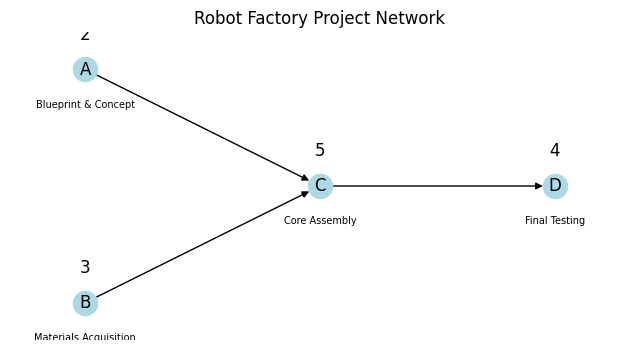

=== CPM Analysis ===
Critical Path: ['B', 'C', 'D']
Total Project Duration: 12 days



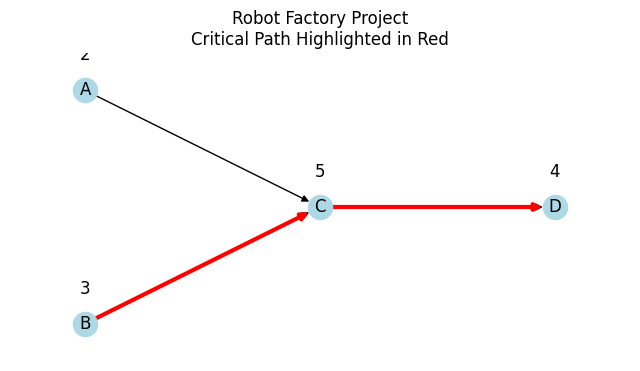

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
from criticalpath import Node

# 1) Define the tasks for Robot Factory Project
tasks = [
    ('A', {'Duration': 2}),  # Blueprint & Concept
    ('B', {'Duration': 3}),  # Materials Acquisition
    ('C', {'Duration': 5}),  # Core Assembly
    ('D', {'Duration': 4})   # Final Testing
]

# 2) Define dependencies: (X, Y) means "Y depends on X"
dependencies = [
    ('A','C'),  # Core Assembly depends on Blueprint
    ('B','C'),  # Core Assembly depends on Materials
    ('C','D')   # Final Testing depends on Core Assembly
]

# 3) Create and visualize the project network
G = nx.DiGraph()
G.add_nodes_from(tasks)
G.add_edges_from(dependencies)

# Position nodes for visualization
pos_nodes = {
    "A": (0, 2),   # Blueprint
    "B": (0, 0),   # Materials
    "C": (4, 1),   # Assembly
    "D": (8, 1)    # Testing
}

# Add descriptive names
long_names = {
    'A': 'Blueprint & Concept',
    'B': 'Materials Acquisition',
    'C': 'Core Assembly',
    'D': 'Final Testing'
}
nx.set_node_attributes(G, long_names, 'LongName')

# Draw the network
fig, ax = plt.subplots(figsize=(8,4))
nx.draw(G, pos=pos_nodes, ax=ax, with_labels=True, node_color='lightblue', arrowsize=10)

# Add duration labels
durations = nx.get_node_attributes(G, 'Duration')
pos_attrs_dur = {node: (coord[0], coord[1] + 0.3) for node, coord in pos_nodes.items()}
nx.draw_networkx_labels(G, pos=pos_attrs_dur, labels=durations)

# Add task names
long_names = nx.get_node_attributes(G, 'LongName')
pos_attrs_long = {node: (coord[0], coord[1] - 0.3) for node, coord in pos_nodes.items()}
nx.draw_networkx_labels(G, pos=pos_attrs_long, labels=long_names, font_size=7)

plt.title("Robot Factory Project Network")
plt.margins(0.1)
plt.show()

# 4) Calculate Critical Path
project = Node("RobotProject")

# Add tasks with durations
for task_name, attr in tasks:
    project.add(Node(task_name, duration=attr['Duration']))

# Add dependencies
for dep in dependencies:
    project.link(dep[0], dep[1])

# Calculate critical path
project.update_all()
critical_path = [str(n) for n in project.get_critical_path()]
project_duration = project.duration

print("=== CPM Analysis ===")
print(f"Critical Path: {critical_path}")
print(f"Total Project Duration: {project_duration} days\n")

# 5) Highlight Critical Path on Graph
crit_edges = [(critical_path[i], critical_path[i+1]) for i in range(len(critical_path)-1)]

fig, ax = plt.subplots(figsize=(8,4))
nx.draw(G, pos=pos_nodes, ax=ax, with_labels=True, node_color='lightblue', arrowsize=10)
nx.draw_networkx_labels(G, pos=pos_attrs_dur, labels=durations)
nx.draw_networkx_edges(G, pos=pos_nodes, edgelist=crit_edges, width=3, edge_color='red')

plt.title("Robot Factory Project\nCritical Path Highlighted in Red")
plt.margins(0.1)
plt.show()

# **Drone Delivery Project: 4-Task Schedule**

In this second mini-project, our robotics company has shifted focus to **developing a drone delivery system**. The project involves four main tasks—outlined below with durations (in days) and dependencies. We can apply methods like **CPM (Critical Path Method)** to determine the minimum completion time and identify any bottlenecks.

---

## **Tasks and Durations**

| **Task** | **Name**                      | **Duration (Days)** |
|:--------:|:-----------------------------:|:--------------------:|
| A        | **Flight Corridor Planning** | 2                    |
| B        | **Drone Procurement**        | 3                    |
| C        | **Assembly & Calibration**   | 5                    |
| D        | **Flight Testing**           | 4                    |

### **Task Descriptions**

1. **Flight Corridor Planning (A)**  
   A team of engineers and city planners identifies **safe flight paths** for autonomous drones, ensuring they avoid restricted airspace and high-density areas. This includes mapping out home delivery points and designing flight schedules.

2. **Drone Procurement (B)**  
   The purchasing department acquires the **core drone hardware**—including chassis, motors, and sensors—from vetted suppliers.  
   > *Partial parallel work with A is possible in real life, but for simplicity, we’ll keep the tasks separate in this model.*

3. **Assembly & Calibration (C)**  
   After corridors are finalized (A) and the hardware arrives (B), the technicians **assemble** the drone and **calibrate** its navigation system. This step ensures it can respond reliably to GPS coordinates and obstacle-detection sensors.

4. **Flight Testing (D)**  
   Once assembly is complete, the drone undergoes **initial flight tests** to validate route planning, airworthiness, and safety protocols. Adjustments are made if any issues arise before public demonstration or pilot launch.

---

## **Dependencies**

| **Dependency** | **Meaning**                                                       |
|:-------------:|:------------------------------------------------------------------|
| A → C         | **Assembly & Calibration (C)** depends on **Flight Corridor Planning (A)** for path configurations and system requirements. |
| B → C         | **Assembly & Calibration (C)** depends on **Drone Procurement (B)** for the physical drone hardware. |
| C → D         | **Flight Testing (D)** starts only after **Assembly & Calibration (C)** is fully completed. |


# **CPM Analysis**

### **1. Calculate the Critical Path and Total Project Duration**

- **Earliest Start (ES)** and **Earliest Finish (EF)** can be derived from forward-pass logic.
- **Latest Start (LS)** and **Latest Finish (LF)** can be derived from backward-pass logic.
- The **critical path** is the sequence of tasks with zero slack, resulting in the **longest path** through the network.

### **2. Show the Critical Path on a Graph**

You can model the tasks as nodes in a directed graph (using libraries like `networkx`) and then highlight the path from the first to last task that yields the greatest total duration.

### **3. Interpret the Results**

- **Total Project Duration**: The time it takes from the start of Task A/B until the completion of Task D on the critical path.
- **Slack Times**: If either A or B is not on the critical path, it might have some slack (float), indicating it can slip a bit without affecting the overall completion date.
- **Practical Insights**: If the team faces delays in a critical-path task, the **entire** project timeline is affected. Efforts (e.g., extra resources or parallelization) should focus on these critical tasks to reduce overall duration.


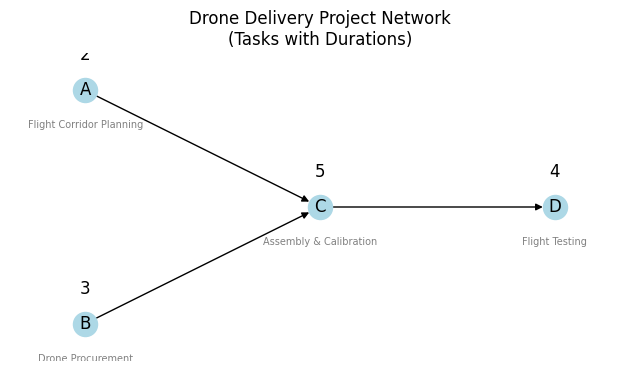

=== CPM Analysis ===
Critical Path: ['B', 'C', 'D']
Total Project Duration: 12 time units (days)



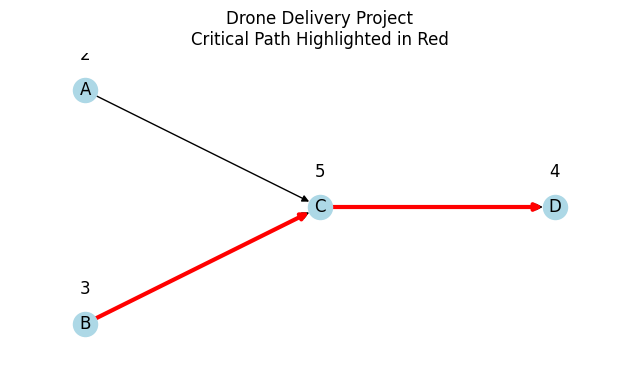

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
from criticalpath import Node

# 1) Define the tasks (name, {duration}), as in a small Drone Delivery Project
tasks = [
    ('A', {'Duration': 2}),  # Flight Corridor Planning
    ('B', {'Duration': 3}),  # Drone Procurement
    ('C', {'Duration': 5}),  # Assembly & Calibration
    ('D', {'Duration': 4})   # Flight Testing
]

# 2) Define dependencies: (X, Y) means "Y depends on X"
dependencies = [
    ('A','C'),  # Assembly & Calibration depends on Flight Corridor Planning
    ('B','C'),  # Assembly & Calibration depends on Drone Procurement
    ('C','D')   # Flight Testing depends on Assembly & Calibration
]

# 3) Create a Directed Graph for visualization
G = nx.DiGraph()

# Add tasks as nodes
G.add_nodes_from(tasks)
# Add edges from dependencies
G.add_edges_from(dependencies)

# Define positions (arbitrary) to place the nodes in the plot
pos_nodes = {
    "A": (0, 2),   # Flight Corridor Planning
    "B": (0, 0),   # Drone Procurement
    "C": (4, 1),   # Assembly & Calibration
    "D": (8, 1)    # Flight Testing
}

# Optionally add descriptive names as attributes
long_names = {
    'A': 'Flight Corridor Planning',
    'B': 'Drone Procurement',
    'C': 'Assembly & Calibration',
    'D': 'Flight Testing'
}
nx.set_node_attributes(G, long_names, 'LongName')

# 4) Visualize the project network
fig, ax = plt.subplots(figsize=(8,4))
nx.draw(G, pos=pos_nodes, ax=ax, with_labels=True, node_color='lightblue', arrowsize=10)

# Extract durations and draw them above nodes
durations = nx.get_node_attributes(G, 'Duration')
pos_attrs_dur = {node: (coord[0], coord[1] + 0.3) for node, coord in pos_nodes.items()}
nx.draw_networkx_labels(G, pos=pos_attrs_dur, labels=durations, font_color='black')

# Extract long names to place below nodes
long_names = nx.get_node_attributes(G, 'LongName')
pos_attrs_long = {node: (coord[0], coord[1] - 0.3) for node, coord in pos_nodes.items()}
nx.draw_networkx_labels(G, pos=pos_attrs_long, labels=long_names, font_size=7, font_color='gray')

plt.title("Drone Delivery Project Network\n(Tasks with Durations)")
plt.margins(0.1)
plt.show()

# 5) Use criticalpath to find the critical path
project = Node("DroneProject")

# Add tasks (Node objects) to the criticalpath project
for task_name, attr in tasks:
    project.add(Node(task_name, duration=attr['Duration']))

# Add each dependency
for dep in dependencies:
    project.link(dep[0], dep[1])

# Update project calculations
project.update_all()

# Extract the critical path and total duration
critical_path = [str(n) for n in project.get_critical_path()]
project_duration = project.duration

print("=== CPM Analysis ===")
print(f"Critical Path: {critical_path}")
print(f"Total Project Duration: {project_duration} time units (days)\n")

# 6) Highlight the critical path on the graph
# Identify edges on the critical path
crit_edges = [(critical_path[i], critical_path[i+1]) for i in range(len(critical_path)-1)]

fig, ax = plt.subplots(figsize=(8,4))
nx.draw(G, pos=pos_nodes, ax=ax, with_labels=True, node_color='lightblue', arrowsize=10)

# We’ll also re-label durations for clarity
nx.draw_networkx_labels(G, pos=pos_attrs_dur, labels=durations, font_color='black')

# Draw the critical edges in red
nx.draw_networkx_edges(G, pos=pos_nodes, ax=ax, edgelist=crit_edges, width=3, edge_color='red')

plt.title("Drone Delivery Project\nCritical Path Highlighted in Red")
plt.margins(0.1)
plt.show()


## Bonus: PERT

Below is an extended version of the Drone Delivery Project example that incorporates PERT (Program Evaluation and Review Technique). Rather than a single fixed duration for each task, we now provide three estimates:

- optimistic (a)
- most likely (m)
- pessimistic (b)

We then compute the expected duration (E) for each task as:

E = (a + 4m + b) / 6

And the variance (σ²) as:

σ² = ((b - a) / 6)²

This expected duration E is used in the CPM calculation to determine the critical path and overall project duration. Additionally, we can sum the variances of the tasks on the critical path (assuming independence) to estimate the standard deviation of the project completion time.

Note: The criticalpath library does not natively incorporate PERT's three estimates. We manually compute the expected durations and feed them into Node as if they were single values.

## **Assumptions for PERT Estimates**

When applying PERT, we assign three durations—optimistic \((a)\), most likely \((m)\), and pessimistic \((b)\)—to each task. The gap between \(a\) and \(b\) reflects uncertainty about how quickly or slowly the task might be completed. Below is an example **assumption table** for the **Drone Delivery** project’s four tasks:

| **Task** | **Description**                           | **Optimistic (a)** | **Most Likely (m)** | **Pessimistic (b)** | **Rationale**                                                                            |
|:--------:|:------------------------------------------|:-------------------:|:--------------------:|:--------------------:|:-----------------------------------------------------------------------------------------|
| **A**    | Flight Corridor Planning                  | 1                  | 2                   | 3                   | *Minimal risk of delay; depends mainly on quick city approval and standard flight rules.* |
| **B**    | Drone Procurement                         | 2                  | 3                   | 4                   | *Slight variability; supply chain issues could delay shipment of key drone components.*   |
| **C**    | Assembly & Calibration                    | 4                  | 5                   | 6                   | *Moderate complexity; unforeseen integration hiccups can push the end date.*             |
| **D**    | Flight Testing                            | 3                  | 4                   | 7                   | *Field tests can vary widely; weather or debugging might add extra days.*                |

### **Why These Estimates?**
- **Optimistic** \((a)\): The scenario in which everything proceeds smoothly (e.g., no unexpected blockers, and resources are instantly available).  
- **Most Likely** \((m)\): The baseline or “normal” case estimate based on historical data and typical workflows.  
- **Pessimistic** \((b)\): Accounts for worst-case events such as severe weather, unanticipated technical rework, or shipping delays.

### **Variance Assumption**
- We calculate variance for each task using:  
  \[
  \sigma^2 = \left(\frac{b - a}{6}\right)^2
  \]  
- **Independence**: We assume each task’s uncertainties are independent. In real-world scenarios, correlation between tasks could exist (e.g., if one delay triggers others).

These estimates guide **PERT** calculations for the **expected duration** and allow us to approximate the **project completion distribution** (summing variances along the critical path).  


In [17]:
# Define tasks with PERT estimates (a, m, b)
tasks = {
    'A': {'name': 'Flight Corridor Planning', 'a': 1, 'm': 2, 'b': 3, 'deps': []},
    'B': {'name': 'Drone Procurement', 'a': 2, 'm': 3, 'b': 4, 'deps': []},
    'C': {'name': 'Assembly & Calibration', 'a': 4, 'm': 5, 'b': 6, 'deps': ['B']},
    'D': {'name': 'Flight Testing', 'a': 3, 'm': 4, 'b': 7, 'deps': ['A', 'C']}
}

# Calculate expected duration and variance for each task
for task_id, task in tasks.items():
    # Expected duration: E = (a + 4m + b) / 6
    task['duration'] = (task['a'] + 4*task['m'] + task['b']) / 6.0
    # Variance: σ² = ((b - a) / 6)²
    task['variance'] = ((task['b'] - task['a']) / 6.0) ** 2

# Initialize the project
project = Node("Drone Delivery Project")

# Add tasks to the project with calculated expected durations
nodes = {}
for task_id, task in tasks.items():
    nodes[task_id] = Node(task_id, duration=task['duration'])  # Use task_id instead of name
    project.add(nodes[task_id])

# Add dependencies using link()
for task_id, task in tasks.items():
    for dep in task['deps']:
        project.link(dep, task_id)  # Link from dependency to task

# Calculate critical path
project.update_all()

# Print results
print("\nPERT Analysis Results:")
print("-" * 50)
print(f"Project Duration (Expected): {project.duration:.2f} days")

# Find critical path
critical_path = [str(n) for n in project.get_critical_path()]
print(f"Critical Path: {' -> '.join(critical_path[1:])}") # Skip project node

# Calculate total variance along critical path
critical_path_variance = sum(tasks[task_id]['variance']
                           for task_id in critical_path[1:])  # Skip project node

critical_path_std_dev = critical_path_variance ** 0.5

# Print 68-95-99.7 rule ranges
print("\nProject Completion Probability Ranges:")
print(f"68% chance between {project.duration - critical_path_std_dev:.2f} and {project.duration + critical_path_std_dev:.2f} days")
print(f"95% chance between {project.duration - 2*critical_path_std_dev:.2f} and {project.duration + 2*critical_path_std_dev:.2f} days")
print(f"99.7% chance between {project.duration - 3*critical_path_std_dev:.2f} and {project.duration + 3*critical_path_std_dev:.2f} days")


PERT Analysis Results:
--------------------------------------------------
Project Duration (Expected): 12.33 days
Critical Path: C -> D

Project Completion Probability Ranges:
68% chance between 11.59 and 13.08 days
95% chance between 10.84 and 13.82 days
99.7% chance between 10.10 and 14.57 days
